In [19]:
import requests
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import string
import spacy
from nltk.tokenize import TweetTokenizer,word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
alexa = []

In [3]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/All-new-Black-combo-Philips-smart/product-reviews/B09X7K9S6G/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    alexa = alexa+ip

In [4]:
with open("alexa_review.txt","w",encoding = 'utf-8') as output:
    output.write(str(alexa))

In [29]:
alexa_review=pd.read_csv("/content/alexa_review.txt")

In [30]:
alexa_review=[x.strip() for x in alexa_review]
alexa_review=[Text for Text in alexa_review if Text]

In [31]:
alexa_review

['["\\nSound quality of this version is much better than other similar versions of it. I couldn\'t get it in the market',
 'the salesman asked me to settle for other version of Alexa but I knew the difference as my friend had it. So',
 'I ordered it online and can defend my decision with the backing of Sound Quality that I get with it.\\n"',
 '"\\nSometimes doesn\'t understand command and integration with YouTube is not supported which is much needed feature.Light also start creating problems over the time over WiFi.\\n"',
 "'\\nIt’s good\\n'",
 "'\\nBecame my day today Assistant as I can manage my day schedule it properly it can play music in two alexa speaker at the same time more and more and more ....Google home pod killer !!!!!\\n'",
 "'\\nBlind buy Echo 4 not the dot.. sound output is amazing with good base. Alexa recognition is on point. Best part is you can connect to your tv with fire stick and normal ppl wont need soundbar as it produces enough sound\\n'",
 "'\\nSuper its goo

In [32]:
join=' '.join(alexa_review)

In [33]:
# Tweet tokenize is used here to remove the usernames present in the data
tkn = TweetTokenizer(strip_handles=True)
tokens=tkn.tokenize(join)

In [34]:
print(tokens)

['[', '"', '\\', 'nSound', 'quality', 'of', 'this', 'version', 'is', 'much', 'better', 'than', 'other', 'similar', 'versions', 'of', 'it', '.', 'I', "couldn't", 'get', 'it', 'in', 'the', 'market', 'the', 'salesman', 'asked', 'me', 'to', 'settle', 'for', 'other', 'version', 'of', 'Alexa', 'but', 'I', 'knew', 'the', 'difference', 'as', 'my', 'friend', 'had', 'it', '.', 'So', 'I', 'ordered', 'it', 'online', 'and', 'can', 'defend', 'my', 'decision', 'with', 'the', 'backing', 'of', 'Sound', 'Quality', 'that', 'I', 'get', 'with', 'it', '.', '\\', 'n', '"', '"', '\\', 'nSometimes', "doesn't", 'understand', 'command', 'and', 'integration', 'with', 'YouTube', 'is', 'not', 'supported', 'which', 'is', 'much', 'needed', 'feature.Light', 'also', 'start', 'creating', 'problems', 'over', 'the', 'time', 'over', 'WiFi', '.', '\\', 'n', '"', "'", '\\', 'nIt', '’', 's', 'good', '\\', 'n', "'", "'", '\\', 'nBecame', 'my', 'day', 'today', 'Assistant', 'as', 'I', 'can', 'manage', 'my', 'day', 'schedule', 'i

In [35]:
token_join=' '.join(tokens)


In [36]:
token_join

'[ " \\ nSound quality of this version is much better than other similar versions of it . I couldn\'t get it in the market the salesman asked me to settle for other version of Alexa but I knew the difference as my friend had it . So I ordered it online and can defend my decision with the backing of Sound Quality that I get with it . \\ n " " \\ nSometimes doesn\'t understand command and integration with YouTube is not supported which is much needed feature.Light also start creating problems over the time over WiFi . \\ n " \' \\ nIt ’ s good \\ n \' \' \\ nBecame my day today Assistant as I can manage my day schedule it properly it can play music in two alexa speaker at the same time more and more and more ... Google home pod killer ! ! ! \\ n \' \' \\ nBlind buy Echo 4 not the dot .. sound output is amazing with good base . Alexa recognition is on point . Best part is you can connect to your tv with fire stick and normal ppl wont need soundbar as it produces enough sound \\ n \' \' \\

In [37]:
rev_string = re.sub("[^A-Za-z" "]+"," ",token_join).lower()
rev_string =re.sub("[0-9" "]+"," ",token_join)

In [38]:
rev_string

'[ " \\ nSound quality of this version is much better than other similar versions of it . I couldn\'t get it in the market the salesman asked me to settle for other version of Alexa but I knew the difference as my friend had it . So I ordered it online and can defend my decision with the backing of Sound Quality that I get with it . \\ n " " \\ nSometimes doesn\'t understand command and integration with YouTube is not supported which is much needed feature.Light also start creating problems over the time over WiFi . \\ n " \' \\ nIt ’ s good \\ n \' \' \\ nBecame my day today Assistant as I can manage my day schedule it properly it can play music in two alexa speaker at the same time more and more and more ... Google home pod killer ! ! ! \\ n \' \' \\ nBlind buy Echo   not the dot .. sound output is amazing with good base . Alexa recognition is on point . Best part is you can connect to your tv with fire stick and normal ppl wont need soundbar as it produces enough sound \\ n \' \' \\

In [39]:
punct=rev_string.translate(str.maketrans('','',string.punctuation))

In [40]:
punct

'   nSound quality of this version is much better than other similar versions of it  I couldnt get it in the market the salesman asked me to settle for other version of Alexa but I knew the difference as my friend had it  So I ordered it online and can defend my decision with the backing of Sound Quality that I get with it   n    nSometimes doesnt understand command and integration with YouTube is not supported which is much needed featureLight also start creating problems over the time over WiFi   n    nIt ’ s good  n    nBecame my day today Assistant as I can manage my day schedule it properly it can play music in two alexa speaker at the same time more and more and more  Google home pod killer     n    nBlind buy Echo   not the dot  sound output is amazing with good base  Alexa recognition is on point  Best part is you can connect to your tv with fire stick and normal ppl wont need soundbar as it produces enough sound  n    nSuper its good if give wall Mount stand with alexa  n    n

In [41]:
import nltk
nltk.download('punkt')
token=word_tokenize(url)
print(token)

['nSound', 'quality', 'of', 'this', 'version', 'is', 'much', 'better', 'than', 'other', 'similar', 'versions', 'of', 'it', 'I', 'couldnt', 'get', 'it', 'in', 'the', 'market', 'the', 'salesman', 'asked', 'me', 'to', 'settle', 'for', 'other', 'version', 'of', 'Alexa', 'but', 'I', 'knew', 'the', 'difference', 'as', 'my', 'friend', 'had', 'it', 'So', 'I', 'ordered', 'it', 'online', 'and', 'can', 'defend', 'my', 'decision', 'with', 'the', 'backing', 'of', 'Sound', 'Quality', 'that', 'I', 'get', 'with', 'it', 'n', 'nSometimes', 'doesnt', 'understand', 'command', 'and', 'integration', 'with', 'YouTube', 'is', 'not', 'supported', 'which', 'is', 'much', 'needed', 'featureLight', 'also', 'start', 'creating', 'problems', 'over', 'the', 'time', 'over', 'WiFi', 'n', 'nIt', '’', 's', 'good', 'n', 'nBecame', 'my', 'day', 'today', 'Assistant', 'as', 'I', 'can', 'manage', 'my', 'day', 'schedule', 'it', 'properly', 'it', 'can', 'play', 'music', 'in', 'two', 'alexa', 'speaker', 'at', 'the', 'same', 'time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
nltk.download('stopwords')
stop_words=stopwords.words('english')
sw = ['\x92','rt','ye','U0001F923','I','yeah','haha','n']
stop_words.extend(sw)
no_stop=[word for word in token if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
lowercase=[y.lower() for y in no_stop]

In [44]:
lowercase

['nsound',
 'quality',
 'version',
 'much',
 'better',
 'similar',
 'versions',
 'couldnt',
 'get',
 'market',
 'salesman',
 'asked',
 'settle',
 'version',
 'alexa',
 'knew',
 'difference',
 'friend',
 'so',
 'ordered',
 'online',
 'defend',
 'decision',
 'backing',
 'sound',
 'quality',
 'get',
 'nsometimes',
 'doesnt',
 'understand',
 'command',
 'integration',
 'youtube',
 'supported',
 'much',
 'needed',
 'featurelight',
 'also',
 'start',
 'creating',
 'problems',
 'time',
 'wifi',
 'nit',
 '’',
 'good',
 'nbecame',
 'day',
 'today',
 'assistant',
 'manage',
 'day',
 'schedule',
 'properly',
 'play',
 'music',
 'two',
 'alexa',
 'speaker',
 'time',
 'google',
 'home',
 'pod',
 'killer',
 'nblind',
 'buy',
 'echo',
 '4',
 'dot',
 'sound',
 'output',
 'amazing',
 'good',
 'base',
 'alexa',
 'recognition',
 'point',
 'best',
 'part',
 'connect',
 'tv',
 'fire',
 'stick',
 'normal',
 'ppl',
 'wont',
 'need',
 'soundbar',
 'produces',
 'enough',
 'sound',
 'nsuper',
 'good',
 'give',


In [45]:
nlp=spacy.load('en_core_web_sm')
txt=nlp(' '.join(lowercase))

In [46]:
lemmas=[z.lemma_ for z in txt]

In [47]:
data_lemma=' '.join(lemmas)

In [48]:
data_lemma

"nsound quality version much well similar version could not get market salesman ask settle version alexa know difference friend so order online defend decision back sound quality get nsometime do not understand command integration youtube support much need featurelight also start create problem time wifi nit ' good nbecame day today assistant manage day schedule properly play music two alexa speaker time google home pod killer nblind buy echo 4 dot sound output amazing good base alexa recognition point good part connect tv fire stick normal ppl will not need soundbar produce enough sound nsuper good give wall mount stand alexa nexcellent product super quality it capable play audible audio book read kindle e book also wander read capable reading kindle book enjoy nsound quality version much well similar version could not get market salesman ask settle version alexa know difference friend so 1 order online defend decision back sound quality get 1 nsometime do not understand command integ

# CountVectorizer

In [49]:
cv=CountVectorizer()
cvdata=cv.fit_transform(lemmas)
cv.vocabulary_

{'nsound': 53,
 'quality': 67,
 'version': 89,
 'much': 43,
 'well': 93,
 'similar': 74,
 'could': 16,
 'not': 51,
 'get': 30,
 'market': 41,
 'salesman': 71,
 'ask': 5,
 'settle': 73,
 'alexa': 2,
 'know': 39,
 'difference': 21,
 'friend': 29,
 'so': 75,
 'order': 56,
 'online': 55,
 'defend': 20,
 'decision': 19,
 'back': 9,
 'sound': 76,
 'nsometime': 52,
 'do': 22,
 'understand': 88,
 'command': 14,
 'integration': 35,
 'youtube': 96,
 'support': 83,
 'need': 47,
 'featurelight': 27,
 'also': 3,
 'start': 80,
 'create': 17,
 'problem': 63,
 'time': 84,
 'wifi': 94,
 'nit': 49,
 'good': 32,
 'nbecame': 45,
 'day': 18,
 'today': 85,
 'assistant': 6,
 'manage': 40,
 'schedule': 72,
 'properly': 66,
 'play': 59,
 'music': 44,
 'two': 87,
 'speaker': 78,
 'google': 33,
 'home': 34,
 'pod': 60,
 'killer': 37,
 'nblind': 46,
 'buy': 12,
 'echo': 24,
 'dot': 23,
 'output': 57,
 'amazing': 4,
 'base': 10,
 'recognition': 70,
 'point': 61,
 'part': 58,
 'connect': 15,
 'tv': 86,
 'fire': 28,

In [50]:
cv.get_feature_names_out()

array(['10', '11', 'alexa', 'also', 'amazing', 'ask', 'assistant',
       'audible', 'audio', 'back', 'base', 'book', 'buy', 'capable',
       'command', 'connect', 'could', 'create', 'day', 'decision',
       'defend', 'difference', 'do', 'dot', 'echo', 'enjoy', 'enough',
       'featurelight', 'fire', 'friend', 'get', 'give', 'good', 'google',
       'home', 'integration', 'it', 'killer', 'kindle', 'know', 'manage',
       'market', 'mount', 'much', 'music', 'nbecame', 'nblind', 'need',
       'nexcellent', 'nit', 'normal', 'not', 'nsometime', 'nsound',
       'nsuper', 'online', 'order', 'output', 'part', 'play', 'pod',
       'point', 'ppl', 'problem', 'produce', 'product', 'properly',
       'quality', 'read', 'reading', 'recognition', 'salesman',
       'schedule', 'settle', 'similar', 'so', 'sound', 'soundbar',
       'speaker', 'stand', 'start', 'stick', 'super', 'support', 'time',
       'today', 'tv', 'two', 'understand', 'version', 'wall', 'wander',
       'wandering', 'well

N gram

In [51]:
ngram=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=120)
modelngram=ngram.fit_transform(lemmas)

In [52]:
ngram.get_feature_names_out()

array(['10', '11', 'alexa', 'also', 'amazing', 'ask', 'assistant',
       'audible', 'audio', 'back', 'base', 'book', 'buy', 'capable',
       'command', 'connect', 'could', 'create', 'day', 'decision',
       'defend', 'difference', 'do', 'dot', 'echo', 'enjoy', 'enough',
       'featurelight', 'fire', 'friend', 'get', 'give', 'good', 'google',
       'home', 'integration', 'it', 'killer', 'kindle', 'know', 'manage',
       'market', 'mount', 'much', 'music', 'nbecame', 'nblind', 'need',
       'nexcellent', 'nit', 'normal', 'not', 'nsometime', 'nsound',
       'nsuper', 'online', 'order', 'output', 'part', 'play', 'pod',
       'point', 'ppl', 'problem', 'produce', 'product', 'properly',
       'quality', 'read', 'reading', 'recognition', 'salesman',
       'schedule', 'settle', 'similar', 'so', 'sound', 'soundbar',
       'speaker', 'stand', 'start', 'stick', 'super', 'support', 'time',
       'today', 'tv', 'two', 'understand', 'version', 'wall', 'wander',
       'wandering', 'well

# TF-IDF Vectorizer

In [53]:
tfidf=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=400)
tfidfvector=tfidf.fit_transform(lemmas)

In [54]:
tfidf.get_feature_names_out()

array(['10', '11', 'alexa', 'also', 'amazing', 'ask', 'assistant',
       'audible', 'audio', 'back', 'base', 'book', 'buy', 'capable',
       'command', 'connect', 'could', 'create', 'day', 'decision',
       'defend', 'difference', 'do', 'dot', 'echo', 'enjoy', 'enough',
       'featurelight', 'fire', 'friend', 'get', 'give', 'good', 'google',
       'home', 'integration', 'it', 'killer', 'kindle', 'know', 'manage',
       'market', 'mount', 'much', 'music', 'nbecame', 'nblind', 'need',
       'nexcellent', 'nit', 'normal', 'not', 'nsometime', 'nsound',
       'nsuper', 'online', 'order', 'output', 'part', 'play', 'pod',
       'point', 'ppl', 'problem', 'produce', 'product', 'properly',
       'quality', 'read', 'reading', 'recognition', 'salesman',
       'schedule', 'settle', 'similar', 'so', 'sound', 'soundbar',
       'speaker', 'stand', 'start', 'stick', 'super', 'support', 'time',
       'today', 'tv', 'two', 'understand', 'version', 'wall', 'wander',
       'wandering', 'well

Word Cloud

<Figure size 3000x2000 with 0 Axes>

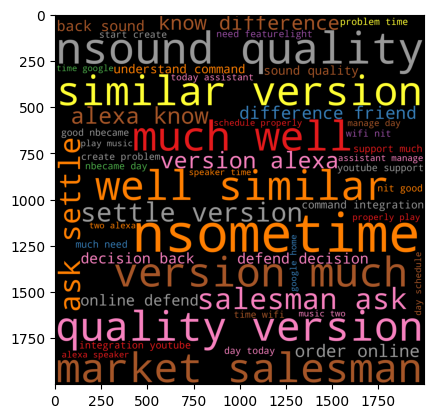

<Figure size 3000x2000 with 0 Axes>

In [56]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word=WordCloud(width=2000,height=2000,background_color='black',max_words=50,
                   colormap='Set1').generate(data_lemma)
plt.imshow(word)
plt.figure(figsize=(30,20))

# Sentiment Analysis

In [57]:
from nltk import tokenize
sent=tokenize.sent_tokenize(' '.join(alexa_review))

In [58]:
sent

['["\\nSound quality of this version is much better than other similar versions of it.',
 "I couldn't get it in the market the salesman asked me to settle for other version of Alexa but I knew the difference as my friend had it.",
 'So I ordered it online and can defend my decision with the backing of Sound Quality that I get with it.\\n" "\\nSometimes doesn\'t understand command and integration with YouTube is not supported which is much needed feature.Light also start creating problems over the time over WiFi.\\n" \'\\nIt’s good\\n\' \'\\nBecame my day today Assistant as I can manage my day schedule it properly it can play music in two alexa speaker at the same time more and more and more ....Google home pod killer !',
 '!!!',
 "!\\n' '\\nBlind buy Echo 4 not the dot.. sound output is amazing with good base.",
 'Alexa recognition is on point.',
 "Best part is you can connect to your tv with fire stick and normal ppl wont need soundbar as it produces enough sound\\n' '\\nSuper its goo

In [59]:
df=pd.DataFrame(sent,columns=['sentence'])

In [60]:
df.head()

,sentence
0,"[""\nSound quality of this version is much bett..."
1,I couldn't get it in the market the salesman a...
2,So I ordered it online and can defend my decis...
3,!!!
4,!\n' '\nBlind buy Echo 4 not the dot.. sound o...


In [63]:
affin=pd.read_csv("/content/Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [64]:
affin_val=affin.set_index('word')['value'].to_dict()

In [65]:
nlp=spacy.load('en_core_web_sm')
sentiment=affin_val

def cal_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment.get(word.lemma_,0)
    return sent_score

In [68]:
cal_sentiment(text='sad')

-2

In [69]:
cal_sentiment(text='good')

3

In [70]:
df['sentiment_val']=df['sentence'].apply(cal_sentiment)

In [71]:
df

,sentence,sentiment_val
0,"[""\nSound quality of this version is much bett...",0
1,I couldn't get it in the market the salesman a...,0
2,So I ordered it online and can defend my decis...,2
3,!!!,0
4,!\n' '\nBlind buy Echo 4 not the dot.. sound o...,7
...,...,...
92,!\n'.11 '\nBlind buy Echo 4 not the dot.. soun...,7
93,Alexa recognition is on point.,0
94,Best part is you can connect to your tv with f...,7
95,It capable to play audible audio books and it ...,2


In [72]:
df.sentiment_val.min()

0

In [73]:
df.sentiment_val.max()

7

(array([49.,  0., 24.,  0.,  0.,  0.,  0.,  0.,  0., 24.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

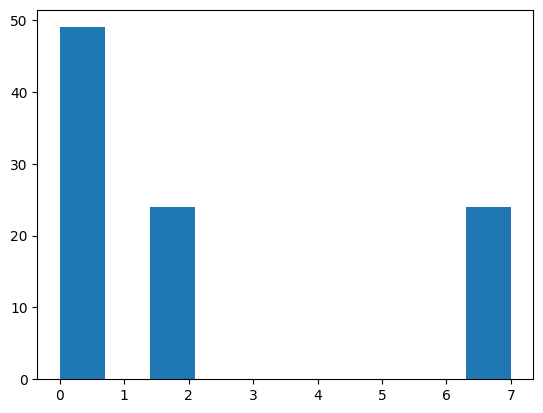

In [77]:
plt.hist(df["sentiment_val"])

In [78]:
with open(r"/content/negative-words.txt","r") as file:
    neg=file.read().split("\n")

In [79]:
with open(r"/content/positive-words.txt","r") as file:
    pos=file.read().split("\n")

In [80]:
neg

['word',
 '2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'a

In [93]:
negative=neg[:]

In [94]:
postive=pos[:]

In [95]:
postive

['word',
 'a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordab

In [96]:
negative

['word',
 '2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'a

In [97]:
nword=' '.join([word for word in negative if word in lowercase])

In [101]:
pword=' '.join([w for w in postive if w in lowercase])

In [99]:
nword

'killer problems'

In [102]:
pword

'amazing audible best better capable enjoying enough good properly super supported'

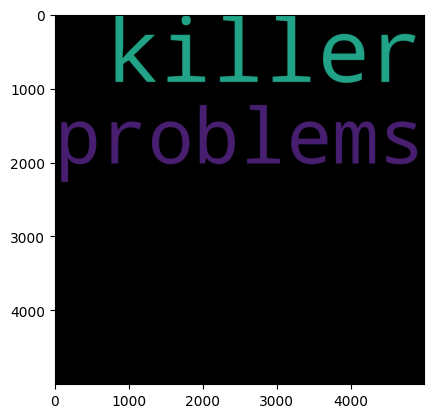

In [103]:
wcneg = WordCloud(
                      background_color='black',
                      width=5000,
                      height=5000
                     ).generate(nword)

plt.imshow(wcneg)

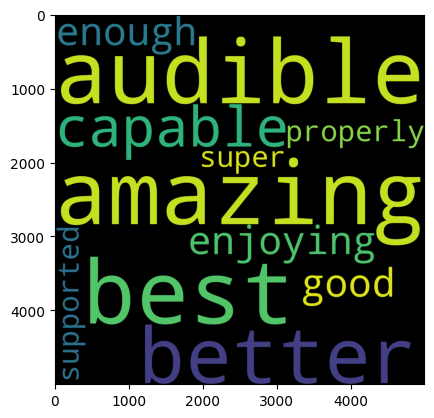

In [104]:
wcpos = WordCloud(
                      background_color='black',
                      width=5000,
                      height=5000
                     ).generate(pword)

plt.imshow(wcpos)